# Analysis of Stock Prices of a set of American Banks between 2006 and 2016




### The Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

%matplotlib inline

sns.set_style('whitegrid')

import plotly
import cufflinks as cf
cf.go_offline()

## Data

Stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)


In [3]:
try:
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

    # CitiGroup
    C = data.DataReader("C", 'google', start, end)

    # Goldman Sachs
    GS = data.DataReader("GS", 'google', start, end)

    # JPMorgan Chase
    JPM = data.DataReader("JPM", 'google', start, end)

    # Morgan Stanley
    MS = data.DataReader("MS", 'google', start, end)

    # Wells Fargo
    WFC = data.DataReader("WFC", 'google', start, end)
    
    df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)
    tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
    bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
    bank_stocks.columns.names = ['Bank Ticker','Stock Info']
    
except :
    tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
    bank_stocks = pd.read_pickle('all_banks')

C:\Users\dylan\Anaconda3\lib\site-packages\pandas_datareader\google\daily.py:40: UnstableAPIWarning:


The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.




FileNotFoundError: [Errno 2] No such file or directory: 'all_banks'

** Check the head of the bank_stocks dataframe.**

In [4]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA


** Max Close price for each bank's stock throughout the time period?**

In [5]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** returns is a  dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [6]:
returns = pd.DataFrame()


** Column for each bank's return**

In [7]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000

** Pairplot of the returns dataframe.**

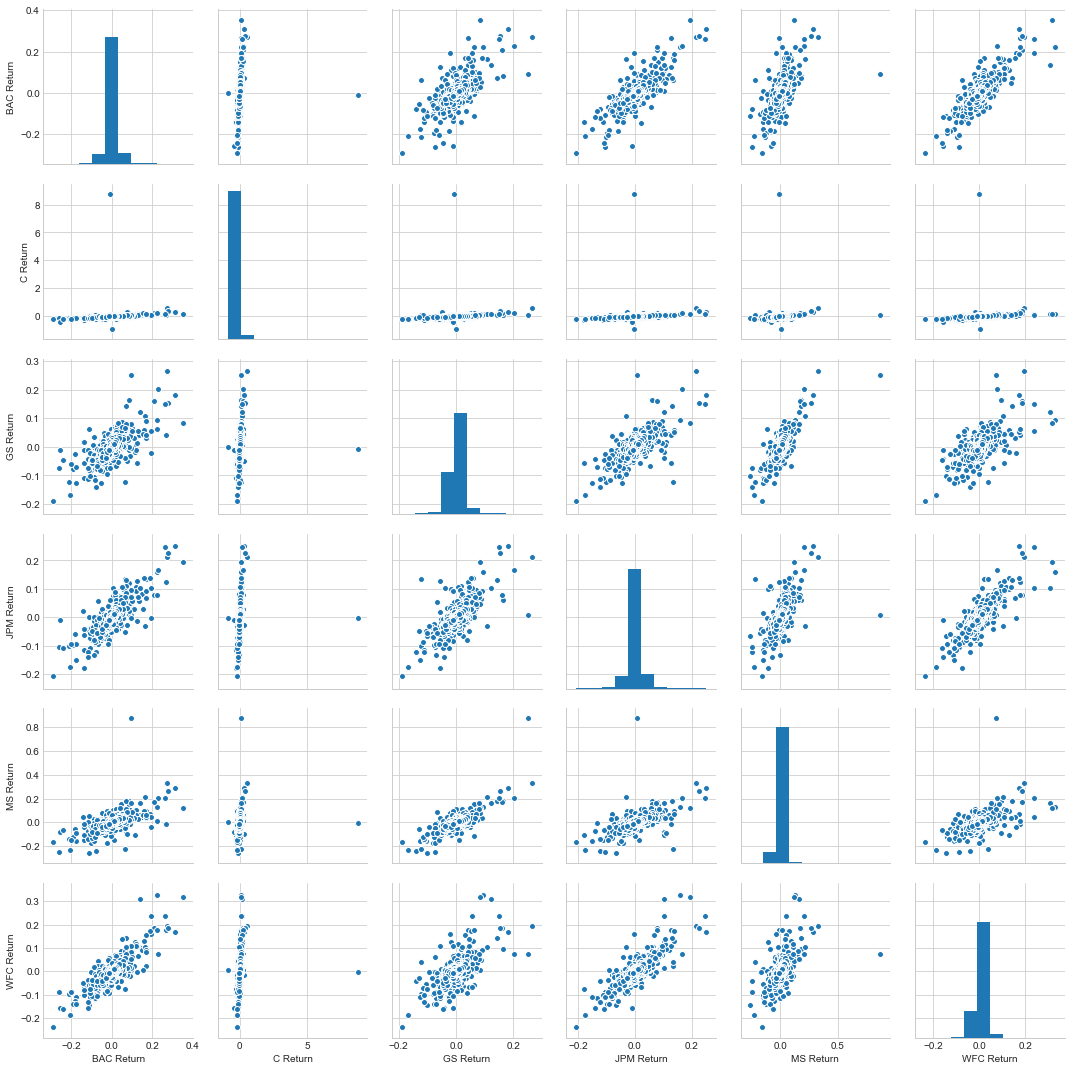

In [8]:


sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 


** What dates each bank stock had the best and worst single day returns**

In [9]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** We see that Citigroup's largest drop and biggest gain were very close to one another.**

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [10]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Standard deviation of the returns**

In [11]:
returns.std() # Citigroup riskiest

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [12]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Distplot of the 2015 returns  **

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'den

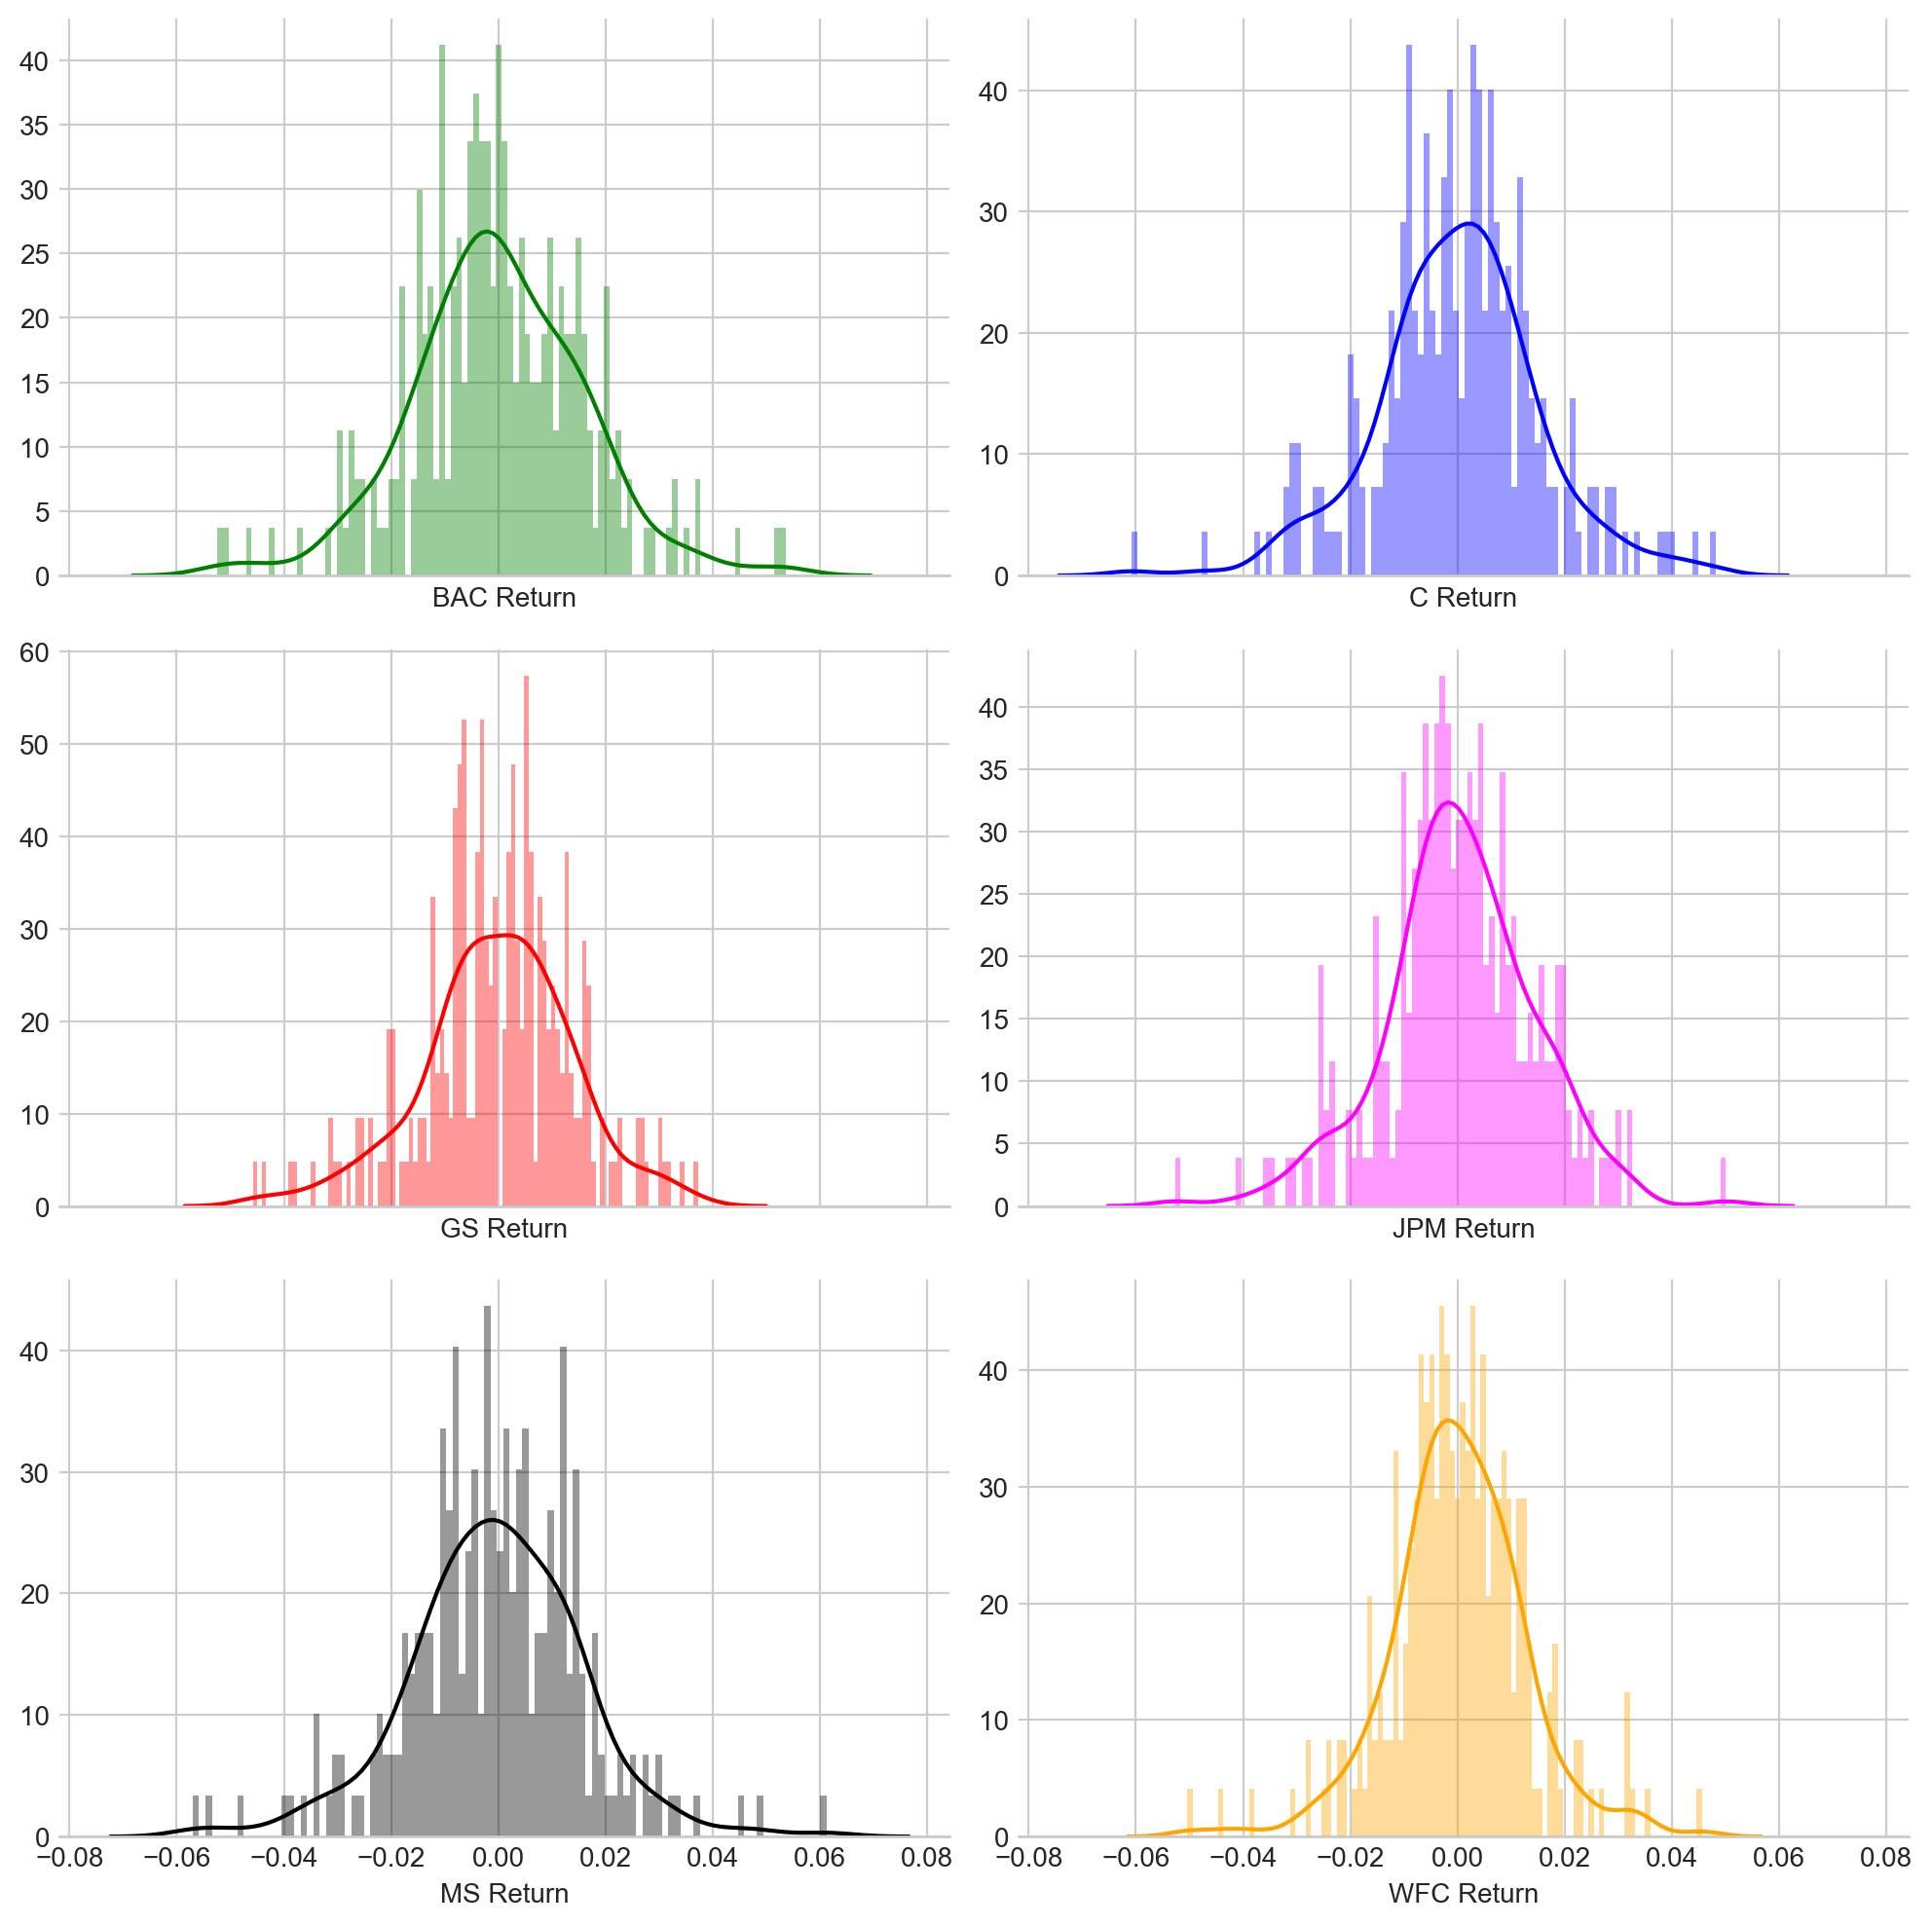

In [13]:
f, axes = plt.subplots(3, 2, figsize=(10, 10),dpi=200, sharex=True)
sns.despine(left=True)
i=returns.columns
sns.distplot(returns.loc['2015-01-01':'2015-12-31'][i[0]],color='green',bins=100,ax=axes[0, 0])
sns.distplot(returns.loc['2015-01-01':'2015-12-31'][i[1]],color='blue',bins=100,ax=axes[0, 1])
sns.distplot(returns.loc['2015-01-01':'2015-12-31'][i[2]],color='red',bins=100,ax=axes[1, 0])
sns.distplot(returns.loc['2015-01-01':'2015-12-31'][i[3]],color='magenta',bins=100,ax=axes[1, 1])
sns.distplot(returns.loc['2015-01-01':'2015-12-31'][i[4]],color='black',bins=100,ax=axes[2, 0])
sns.distplot(returns.loc['2015-01-01':'2015-12-31'][i[5]],color='orange',bins=100,ax=axes[2, 1])
plt.tight_layout()

** Distplot of the 2008 returns **

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\dylan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'den

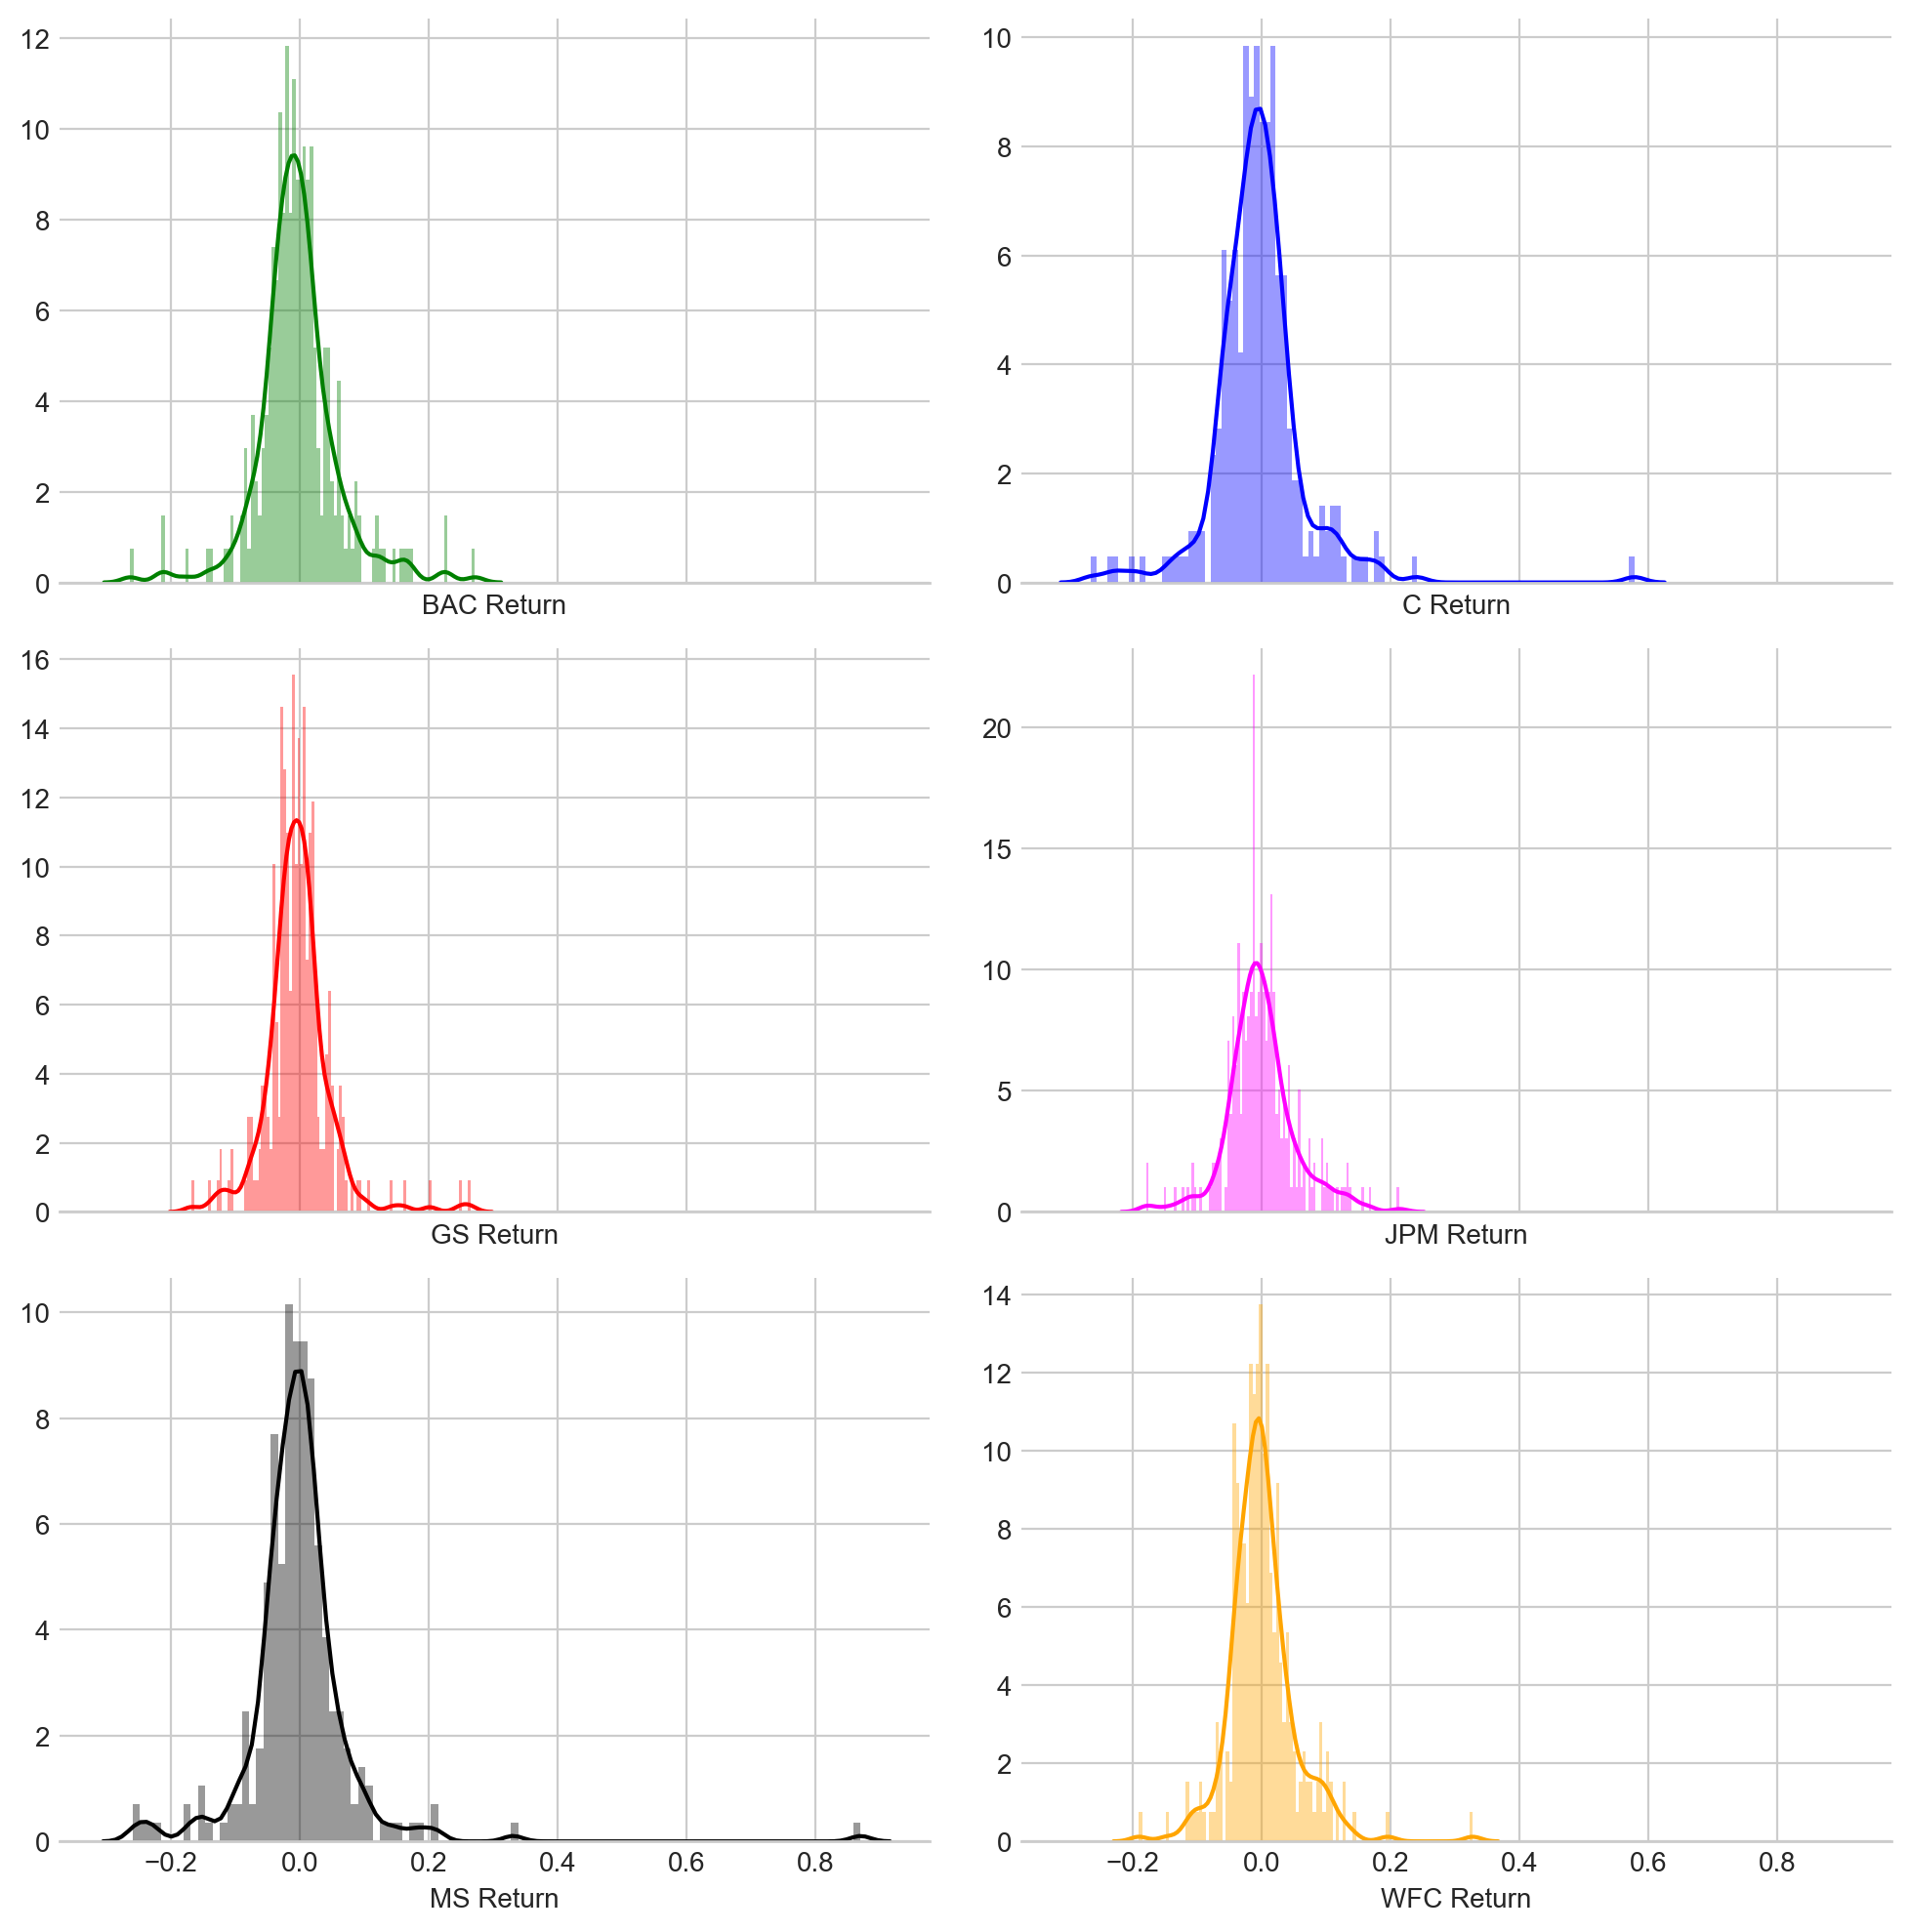

In [14]:
f, axes = plt.subplots(3, 2, figsize=(10, 10),dpi=200, sharex=True)
sns.despine(left=True)
i=returns.columns
sns.distplot(returns.loc['2008-01-01':'2008-12-31'][i[0]],color='green',bins=100,ax=axes[0, 0])
sns.distplot(returns.loc['2008-01-01':'2008-12-31'][i[1]],color='blue',bins=100,ax=axes[0, 1])
sns.distplot(returns.loc['2008-01-01':'2008-12-31'][i[2]],color='red',bins=100,ax=axes[1, 0])
sns.distplot(returns.loc['2008-01-01':'2008-12-31'][i[3]],color='magenta',bins=100,ax=axes[1, 1])
sns.distplot(returns.loc['2008-01-01':'2008-12-31'][i[4]],color='black',bins=100,ax=axes[2, 0])
sns.distplot(returns.loc['2008-01-01':'2008-12-31'][i[5]],color='orange',bins=100,ax=axes[2, 1])
plt.tight_layout()


** Line plot showing Close price for each bank for the entire index of time.**

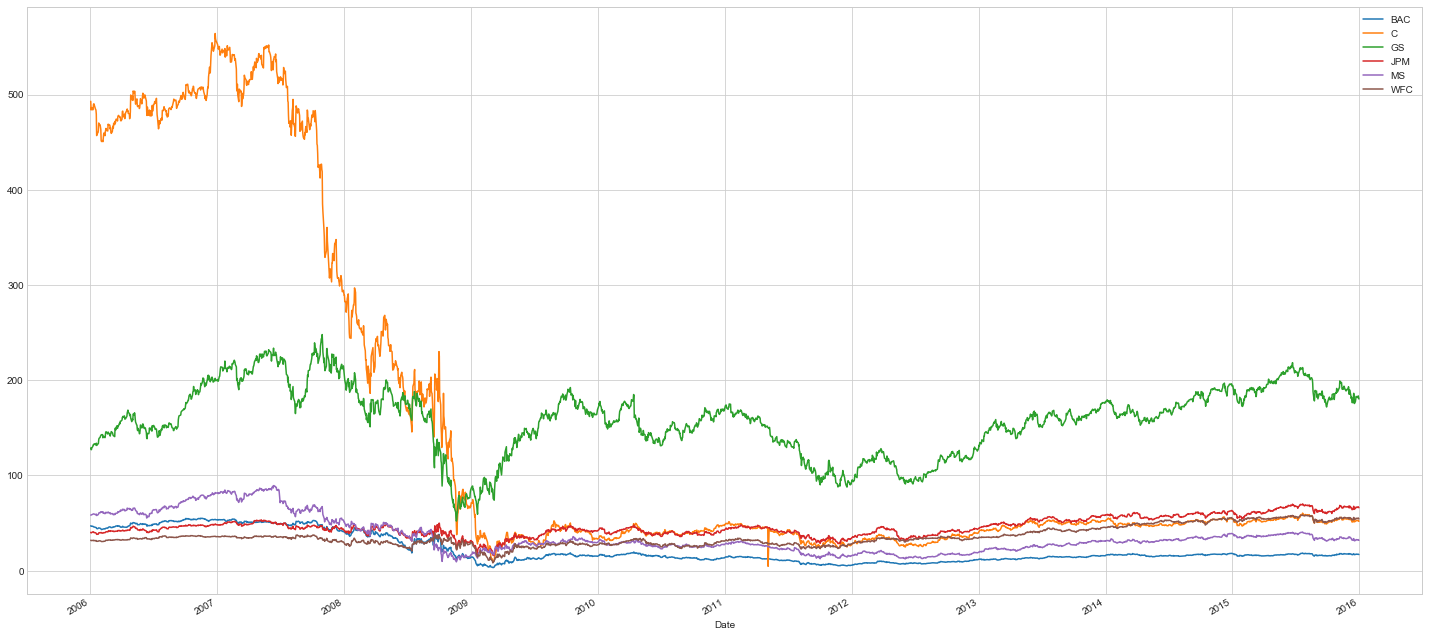

In [15]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(25,12),label=tick)
plt.legend()

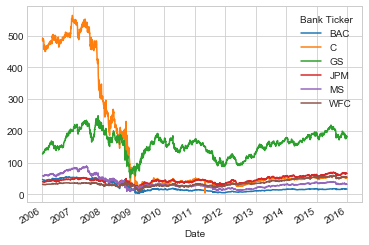

In [16]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [20]:
# # plotly
# bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot(layout = {
#     'bgcolor': '#ffffff'
# })

## Moving Averages

Analyzing the moving averages for these stocks in the year 2008. 

** Rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

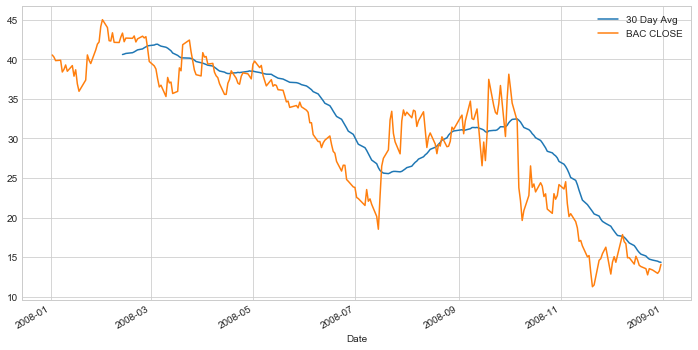

In [21]:
plt.figure(figsize=(12,6))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Heatmap of the correlation between the stocks Close Price.**

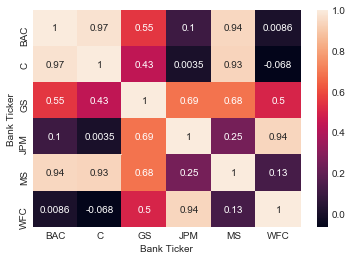

In [26]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Clustermap to cluster the correlations together:**

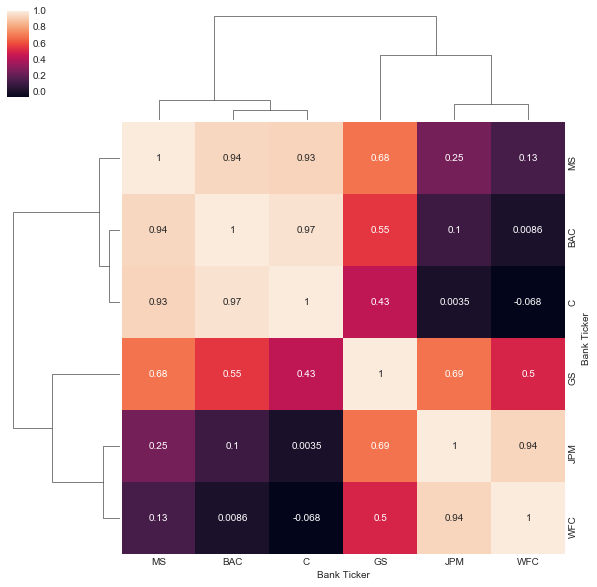

In [27]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [28]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

** Candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [30]:
bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [32]:
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

** Bollinger Band Plot for Bank of America for the year 2015.**

In [33]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')